<a href="https://colab.research.google.com/github/jw9603/machine_learning/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download a data file

In [1]:
!gdown --id 1dPWvYRklVhri_KCOyH5XupqAEUr_1M3Y
!gdown --id 1eTdGJyiPiZ8ffDoLp3KeIsLej0z3zuAG

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1dPWvYRklVhri_KCOyH5XupqAEUr_1M3Y
To: /content/mnist2500_X.txt
100% 31.4M/31.4M [00:00<00:00, 94.4MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1eTdGJyiPiZ8ffDoLp3KeIsLej0z3zuAG
To: /content/mnist2500_labels.txt
100% 42.5k/42.5k [00:00<00:00, 31.5MB/s]


In [2]:
!pip install umap-learn

     |████████████████████████████████| 88 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 1.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=fbe82b7a6dd0569b46560909c6d81318a4edf80c661a5edfe00b3cef6c102eb2
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=54ca2786a5ae9a0cb38dd4ce060870e5693869a8d54b0dd57ede2b0071830ff8
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


### Import libraries

In [3]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
from sklearn.decomposition import PCA
import sklearn.preprocessing
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load data
X = np.loadtxt("./mnist2500_X.txt")
labels = np.loadtxt("./mnist2500_labels.txt")

scaler = sklearn.preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(np.array(X).astype('float64'))
mu = np.mean(X_scaled, axis=0)
X_scaled -= mu

### PCA

In [5]:
def pca(X_scaled, labels):
    model = PCA(n_components=2)
    X_transformed = model.fit_transform(X_scaled)

    plt.figure()

    legend_ = []
    cmap = matplotlib.cm.get_cmap('tab20')
    for i in sorted(list(set(labels))):
        idxs = (labels == i).nonzero()
        l = plt.scatter(np.squeeze(X_transformed[idxs, 0]), X_transformed[idxs, 1], 20, color=cmap(int(i)))
        legend_.append(l)
    plt.legend(legend_, list(range(10)), loc='center left', ncol=1, fontsize=8, bbox_to_anchor=(1, 0.5))

    plt.savefig("pca_mnist.png", bbox_inches='tight')

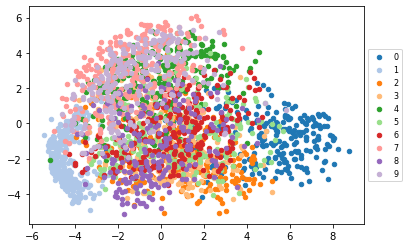

In [6]:
pca(X_scaled, labels)

### t-SNE

In [7]:
def tsne(X_scaled, labels):
    X_transformed = TSNE(n_components=2).fit_transform(X_scaled)

    plt.figure()

    legend_ = []
    cmap = matplotlib.cm.get_cmap('tab20')
    for i in sorted(list(set(labels))):
        idxs = (labels == i).nonzero()
        l = plt.scatter(np.squeeze(X_transformed[idxs, 0]), X_transformed[idxs, 1], 20, color=cmap(int(i)))
        legend_.append(l)
    plt.legend(legend_, list(range(10)), loc='center left', ncol=1, fontsize=8, bbox_to_anchor=(1, 0.5))

    plt.savefig("tsne_mnist.png", bbox_inches='tight')

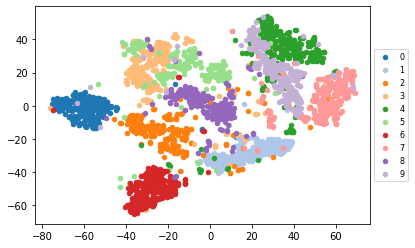

In [8]:
tsne(X_scaled, labels)

In [9]:
def umap_func(X_scaled, labels):
    X_transformed = umap.UMAP(n_neighbors=10, min_dist=0.001).fit_transform(X_scaled)

    plt.figure()

    legend_ = []
    cmap = matplotlib.cm.get_cmap('tab20')
    for i in sorted(list(set(labels))):
        idxs = (labels == i).nonzero()
        l = plt.scatter(np.squeeze(X_transformed[idxs, 0]), X_transformed[idxs, 1], 20, color=cmap(int(i)))
        legend_.append(l)
    plt.legend(legend_, list(range(10)), loc='center left', ncol=1, fontsize=8, bbox_to_anchor=(1, 0.5))

    plt.savefig("tsne_mnist.png", bbox_inches='tight')

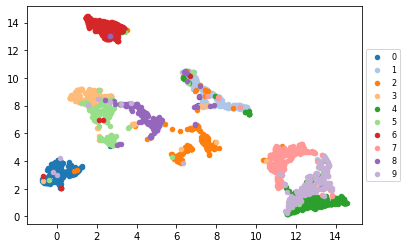

In [10]:
umap_func(X_scaled, labels)